In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [3]:
'''
Ricordiamo che pct_change prende in pasto un numero di steps (1 in sto caso)
e ritorna il cambiamento in percentuale rispetto allo step.
Il motivo è che dopo faremo il join ad avremo contenuto informativo migliore
'''
spy['SPY'] = spy['Close'].pct_change(1)

In [4]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume,SPY
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002647
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004221
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003328


In [5]:
index = pd.read_csv('sp500sub_2.csv', index_col=0, parse_dates=True)

In [14]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [15]:
aapl['AAPL'] = aapl['Close'].pct_change(1)

In [16]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Name,AAPL
Date,,,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400.0,AAPL,NaN
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200.0,AAPL,0.001729
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000.0,AAPL,-0.015906
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800.0,AAPL,-0.001849
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700.0,AAPL,0.006648


In [18]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [19]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


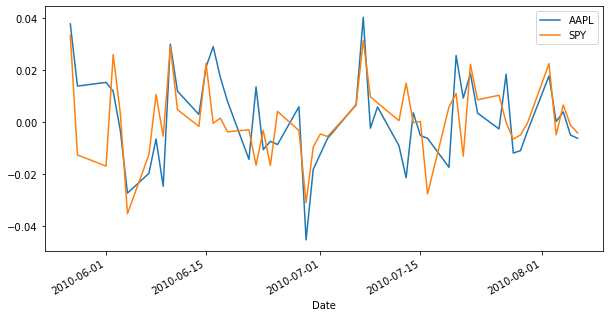

In [22]:
'''
I ritorni sono spesso molto rumorosi, motivo per il quale selezioniamo solo
una parte del dataset per vedere meglio.
Notiamo che i ritorni di apple sembrano tracciare in qualche modo quelli del 
mercato

'''
joined.iloc[100:150].plot(figsize=(10,5));

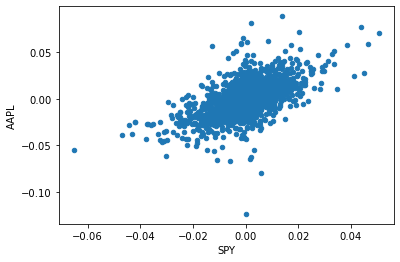

In [23]:
'''
Sembra anche da qui che ci sia una linea verso l'alto che abbia senso
'''
joined.plot.scatter('SPY', 'AAPL')

In [28]:
'''
ATTENZIONE: usare joined['AAPL'] in questo modo, restituirà una lista di
dimensione (x,). Se vogliamo la dimensione (x,1) allora dobbiamo usare
joined[['AAPL']]
'''
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [30]:
X.shape, Y.shape

((2262, 1), (2262, 1))

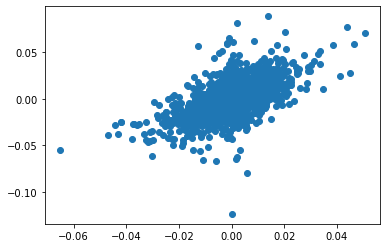

In [31]:
plt.scatter(X, Y)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [33]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

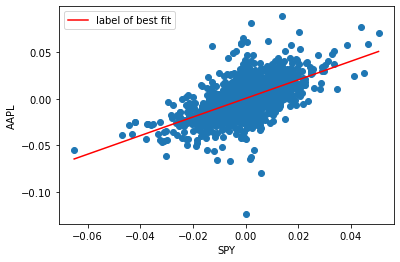

In [35]:
plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict, c='r', label="label of best fit")
plt.legend()

In [37]:
'''
Notiamo come beta e alpha possano essere estratti dal modello.
Abbiamo beta = 1 quasi, significa che Apple segue il mercato quasi
pedissequamente. Alpha, invece, è circa 4.6 "base points" (ricordiamo che sono
percentuale di perceutale)
'''
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

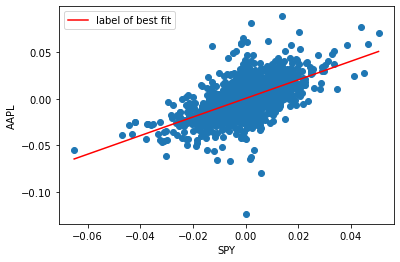

In [38]:
'''
Ora proviamo a calcolare la linea noi per divertimento
'''
Y_predict_mycalc = beta * X_predict + alpha

plt.scatter(X, Y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(X_predict, Y_predict_mycalc, c='r', label="label of best fit")
plt.legend()

In [39]:
'''
Questo ci può far pensare che sia meglio investire in APPLE e non nel mercato.
Stampando la standard, deviation, tuttavia, notiamo come AAPL sia leggermente
più instabile. Qui parliamo di volatilità.
'''
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [41]:
'''
Notiamo come effettivamente, la std è 1.7 volte più alta in apple rispetto
che al mercato. Questo è un effetto comune dove ad alto rischio è legato
ad alto reward
'''
joined['AAPL'].std() / joined['SPY'].std()

1.7179632360403778